# Evaluator-Optimizer Workflow

# In this workflow, one LLM call generates a response while another provides evaluation and feedback in a loop.

# Usecase : Real time DataBase updates


In [3]:
%pip install "pymongo[srv]"

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "sorry i can't share this or commit this to github"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

In [27]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")
from datetime import datetime



In [28]:
list_of_complaints=["My phone network is week","My internet is slow","My bill is too high","I want to change my plan","I want to cancel my internet plan","party tonigth"]


In [29]:
category_of_complaints=["Network","Internet","Billing","Internet Plan","Cancellation"]


In [30]:
for complaint in list_of_complaints:
    # First LLM call - Classify complaint into category
    main_prompt=f"""
    You are a customer service agent. You need to classify the complaint into one of the categories.

    Complaints: {complaint}

    Categories: {category_of_complaints}

    Always return the category in the list of categories
    
    return the category in this XML format(Only the category nothing else(no explanation, no other text)): 
    
 
    <category>
    Category
    </category>
    """
    classification_response = llm.invoke(main_prompt)
    category = classification_response.content.strip("```xml\n<").strip("</category>").strip("\n")
    print(f"Classified category: {category}")

    # Second LLM call - Evaluate classification
    evaluator_prompt=f"""
    Context-
    The previous LLM call has classified the complaint into one of the categories.
    
    You are a feeback generator. You need to evaluate the response of the LLM and give feedback on the response in 0 or 1

    
    Complaint: {complaint}
    Category: {category}

    List of categories to select from: {category_of_complaints}

    If no category is found in the list of categories, return 0

    return the feedback(True or False)

    Only return True or False no other text or explanation

    """
    evaluation_response = llm.invoke(evaluator_prompt)
    feedback = evaluation_response.content
    print(f"Evaluation feedback: {feedback}")

    # Store results in appropriate MongoDB collection based on evaluation
    db = client['customer_service']
    if feedback == "False":    
        complaints_collection = db['complaints_unclassified']
    else:
        complaints_collection = db['complaints']

    # Create and insert document
    complaint_doc = {
        "complaint": complaint, # Complaint         
        "category": category, # Category
        "evaluation_feedback": feedback, # Feedback
        "time": datetime.now() # Time
    }
    complaints_collection.insert_one(complaint_doc)


Classified category: Network
Evaluation feedback: True
Classified category: Internet
Evaluation feedback: True
Classified category: Billing
Evaluation feedback: True
Classified category: Internet Plan
Evaluation feedback: True
Classified category: Cancellation
Evaluation feedback: True
Classified category: None
Evaluation feedback: False


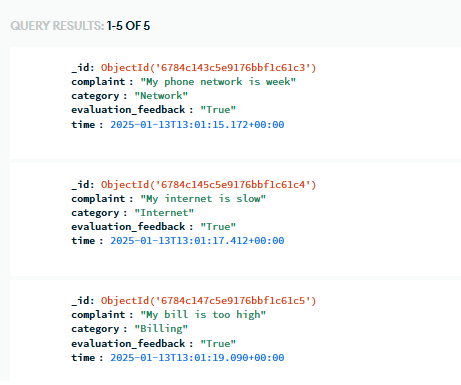

In [33]:
# Images from database

# Display image in Jupyter notebook
from IPython.display import display, Image

path = "mongo_lecture_5.png"
display(Image(filename=path))  # display image


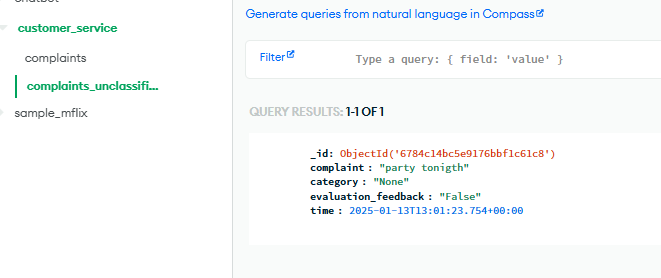

In [34]:
# Images from database

# Display image in Jupyter notebook
from IPython.display import display, Image

path = "mongo_lecture_5_1.png"
display(Image(filename=path))  # display image
